<a href="https://www.kaggle.com/code/amansingh0000000/futures-resources?scriptVersionId=231313208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings

import statistics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historical-prices-of-major-natural-resource/Futures_Resources_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/historical-prices-of-major-natural-resource/Futures_Resources_Data.csv')
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price
0,29/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.700012,NaN
1,30/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.299988,NaN
2,31/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.200012,NaN
3,03/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.500000,NaN
4,04/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.700012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6900,26/03/2025,69.650002,73.790001,3020.899902,34.033001,3.861,451.25,535.25,1001.00,5.2160,967.900024,962.500000
6901,27/03/2025,69.919998,74.029999,3060.199951,34.896999,3.950,450.00,532.00,1016.75,5.0975,983.200012,973.799988
6902,28/03/2025,69.360001,73.629997,3086.500000,34.644001,4.065,453.25,528.25,1023.00,5.1125,977.700012,974.299988
6903,31/03/2025,71.480003,74.739998,3122.800049,34.457001,4.119,457.25,537.00,1014.75,5.0200,1009.700012,991.200012


# DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6905 non-null   object 
 1   CL=F_closing_price  6177 non-null   float64
 2   BZ=F_closing_price  4395 non-null   float64
 3   GC=F_closing_price  6168 non-null   float64
 4   SI=F_closing_price  6170 non-null   float64
 5   NG=F_closing_price  6174 non-null   float64
 6   ZC=F_closing_price  6181 non-null   float64
 7   ZW=F_closing_price  6193 non-null   float64
 8   ZS=F_closing_price  6173 non-null   float64
 9   HG=F_closing_price  6173 non-null   float64
 10  PL=F_closing_price  6196 non-null   float64
 11  PA=F_closing_price  6208 non-null   float64
dtypes: float64(11), object(1)
memory usage: 647.5+ KB


In [4]:
df = df.drop(columns=['Date'])

In [5]:
mask = np.isinf(df)
print(mask)

      CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
0                  False               False               False   
1                  False               False               False   
2                  False               False               False   
3                  False               False               False   
4                  False               False               False   
...                  ...                 ...                 ...   
6900               False               False               False   
6901               False               False               False   
6902               False               False               False   
6903               False               False               False   
6904               False               False               False   

      SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
0                  False               False               False   
1                  False               False   

In [6]:
df_1 = df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [7]:
df_1 = df

In [8]:
df.columns

Index(['CL=F_closing_price', 'BZ=F_closing_price', 'GC=F_closing_price',
       'SI=F_closing_price', 'NG=F_closing_price', 'ZC=F_closing_price',
       'ZW=F_closing_price', 'ZS=F_closing_price', 'HG=F_closing_price',
       'PL=F_closing_price', 'PA=F_closing_price'],
      dtype='object')

In [9]:
mode = df.mean()

In [10]:
df.fillna(mode,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CL=F_closing_price  6905 non-null   float64
 1   BZ=F_closing_price  6905 non-null   float64
 2   GC=F_closing_price  6905 non-null   float64
 3   SI=F_closing_price  6905 non-null   float64
 4   NG=F_closing_price  6905 non-null   float64
 5   ZC=F_closing_price  6905 non-null   float64
 6   ZW=F_closing_price  6905 non-null   float64
 7   ZS=F_closing_price  6905 non-null   float64
 8   HG=F_closing_price  6905 non-null   float64
 9   PL=F_closing_price  6905 non-null   float64
 10  PA=F_closing_price  6905 non-null   float64
dtypes: float64(11)
memory usage: 593.5 KB


In [12]:
df = df.astype(int)

In [13]:
df

,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price
0,64,78,1178,17,4,411,538,1006,2,402,840
1,64,78,1178,17,4,411,538,1006,2,405,840
2,64,78,1178,17,4,411,538,1006,2,404,840
3,64,78,1178,17,4,411,538,1006,2,406,840
4,64,78,1178,17,4,411,538,1006,2,405,840
...,...,...,...,...,...,...,...,...,...,...,...
6900,69,73,3020,34,3,451,535,1001,5,967,962
6901,69,74,3060,34,3,450,532,1016,5,983,973
6902,69,73,3086,34,4,453,528,1023,5,977,974
6903,71,74,3122,34,4,457,537,1014,5,1009,991


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CL=F_closing_price  6905 non-null   int64
 1   BZ=F_closing_price  6905 non-null   int64
 2   GC=F_closing_price  6905 non-null   int64
 3   SI=F_closing_price  6905 non-null   int64
 4   NG=F_closing_price  6905 non-null   int64
 5   ZC=F_closing_price  6905 non-null   int64
 6   ZW=F_closing_price  6905 non-null   int64
 7   ZS=F_closing_price  6905 non-null   int64
 8   HG=F_closing_price  6905 non-null   int64
 9   PL=F_closing_price  6905 non-null   int64
 10  PA=F_closing_price  6905 non-null   int64
dtypes: int64(11)
memory usage: 593.5 KB


In [15]:
df = df.rename(columns={df.columns[0]:'WTI Oil Price',df.columns[1]:'Brent Oil Price',df.columns[2]:'Gold Price',df.columns[3]:'Silver Price'
                       ,df.columns[4]:'Natural Gas Price',df.columns[5]:'Corn Price',df.columns[6]:'Wheat Price',df.columns[7]:'Soybean Price',
                       df.columns[8]:'Copper Price',df.columns[9]:'Platinum Price',df.columns[10]:'Palladium Price'})

In [16]:
df

,WTI Oil Price,Brent Oil Price,Gold Price,Silver Price,Natural Gas Price,Corn Price,Wheat Price,Soybean Price,Copper Price,Platinum Price,Palladium Price
0,64,78,1178,17,4,411,538,1006,2,402,840
1,64,78,1178,17,4,411,538,1006,2,405,840
2,64,78,1178,17,4,411,538,1006,2,404,840
3,64,78,1178,17,4,411,538,1006,2,406,840
4,64,78,1178,17,4,411,538,1006,2,405,840
...,...,...,...,...,...,...,...,...,...,...,...
6900,69,73,3020,34,3,451,535,1001,5,967,962
6901,69,74,3060,34,3,450,532,1016,5,983,973
6902,69,73,3086,34,4,453,528,1023,5,977,974
6903,71,74,3122,34,4,457,537,1014,5,1009,991


In [17]:
# col_feat = ['WTI Oil Price', 'Brent Oil Price', 'Gold Price', 'Silver Price',
#        'Natural Gas Price', 'Corn Price', 'Wheat Price', 'Soybean Price',
#        'Copper Price', 'Platinum Price', 'Palladium Price']

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for column in col_feat:
#     df[column] = le.fit_transform(df[column])

# VIZUALLIZATION

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df.columns

Index(['WTI Oil Price', 'Brent Oil Price', 'Gold Price', 'Silver Price',
       'Natural Gas Price', 'Corn Price', 'Wheat Price', 'Soybean Price',
       'Copper Price', 'Platinum Price', 'Palladium Price'],
      dtype='object')

In [20]:
cols = ['WTI Oil Price', 'Brent Oil Price', 'Gold Price', 'Silver Price',
       'Natural Gas Price', 'Corn Price', 'Wheat Price', 'Soybean Price',
       'Copper Price', 'Platinum Price', 'Palladium Price']

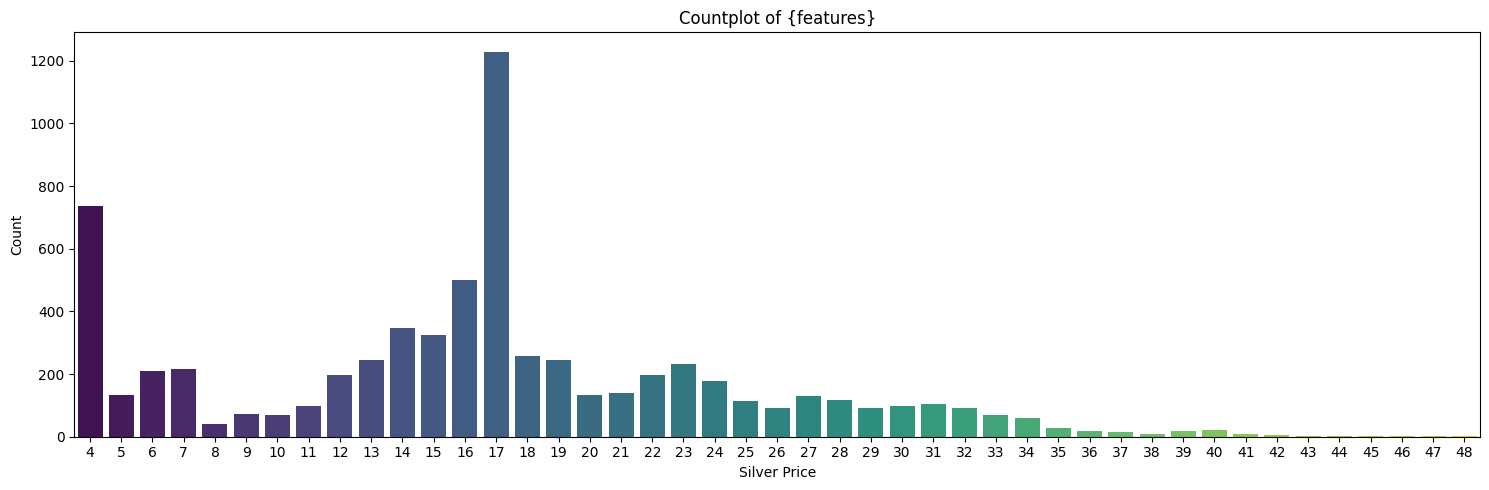

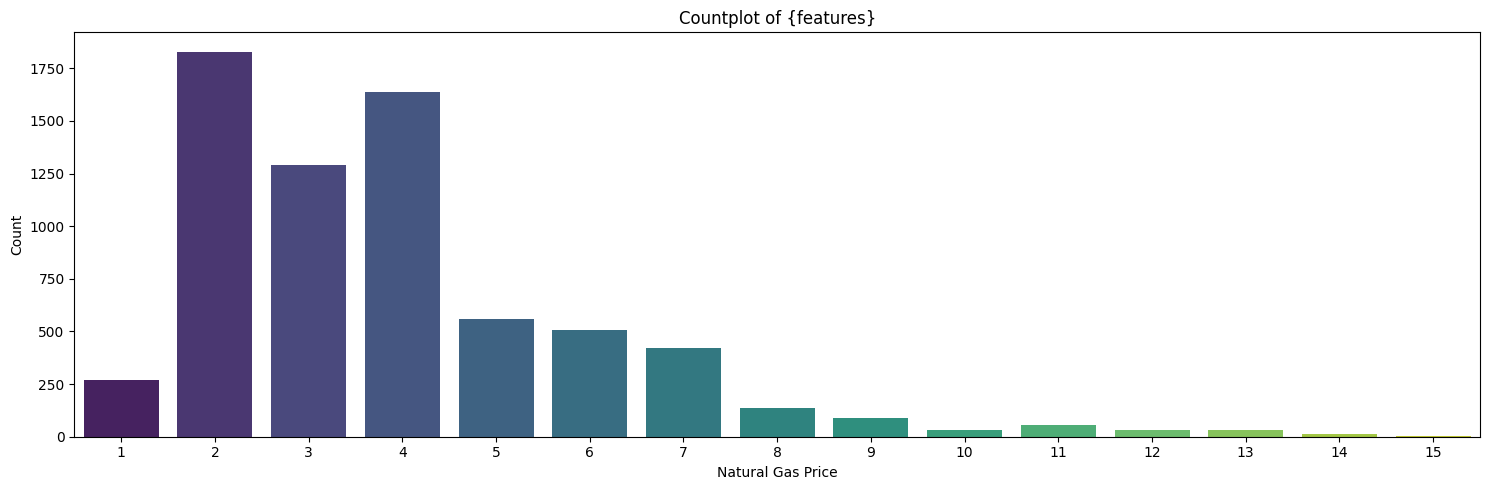

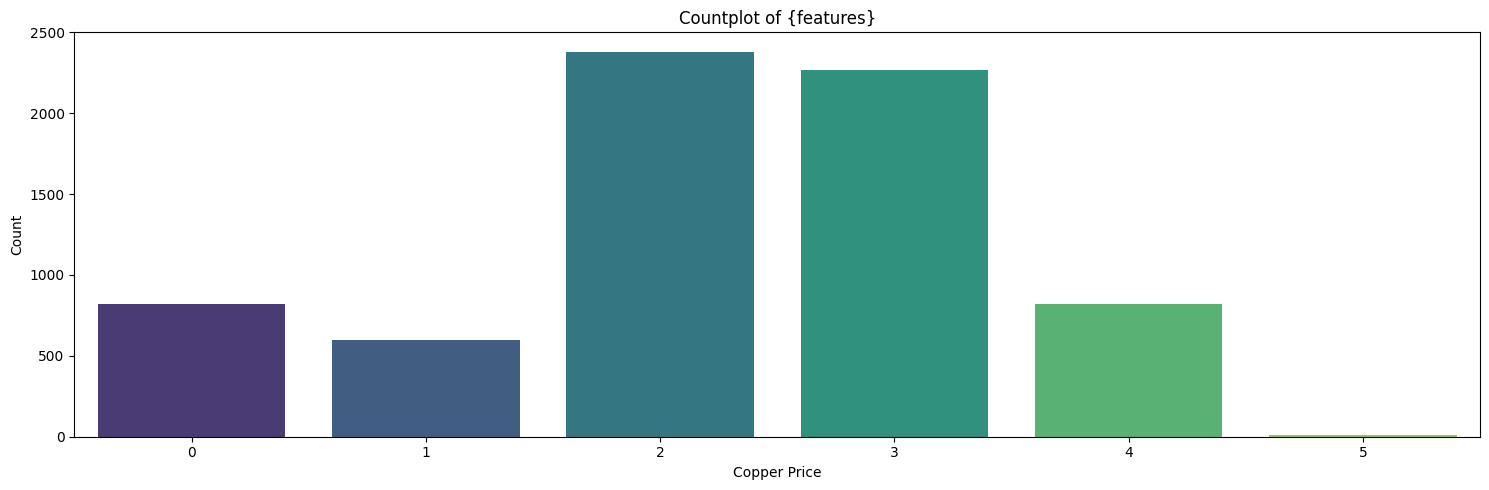

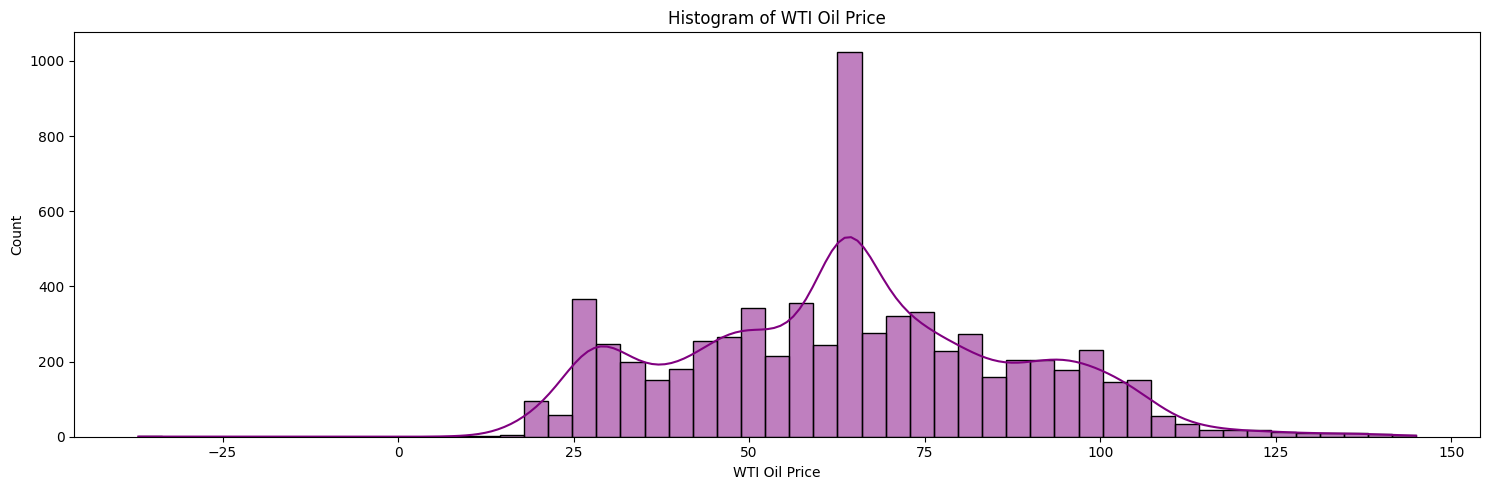

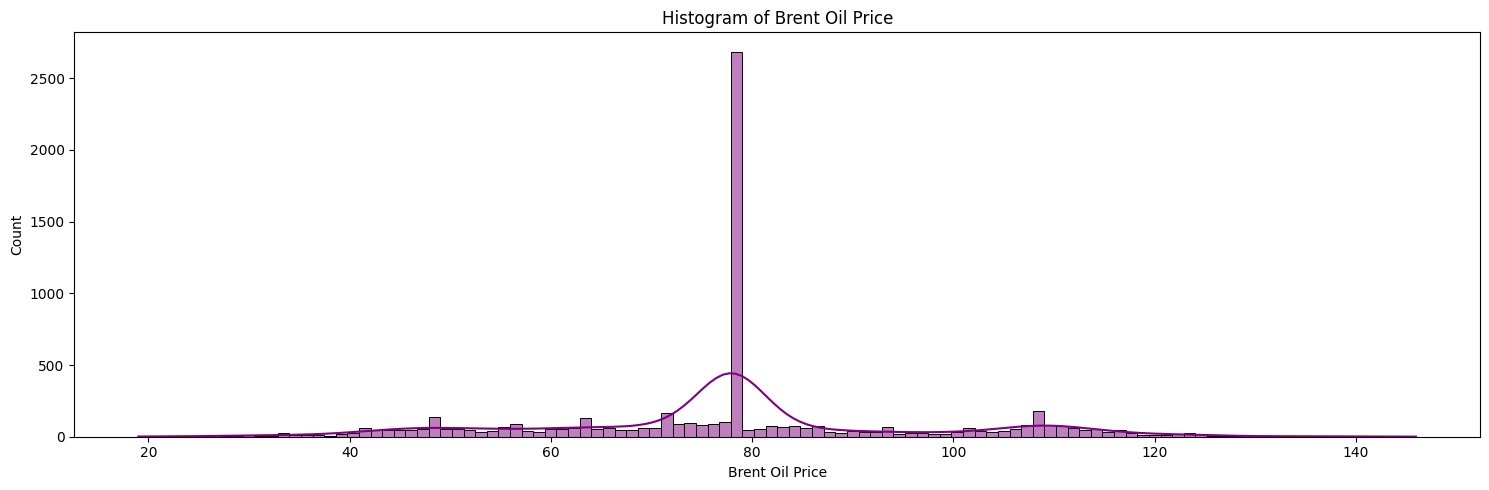

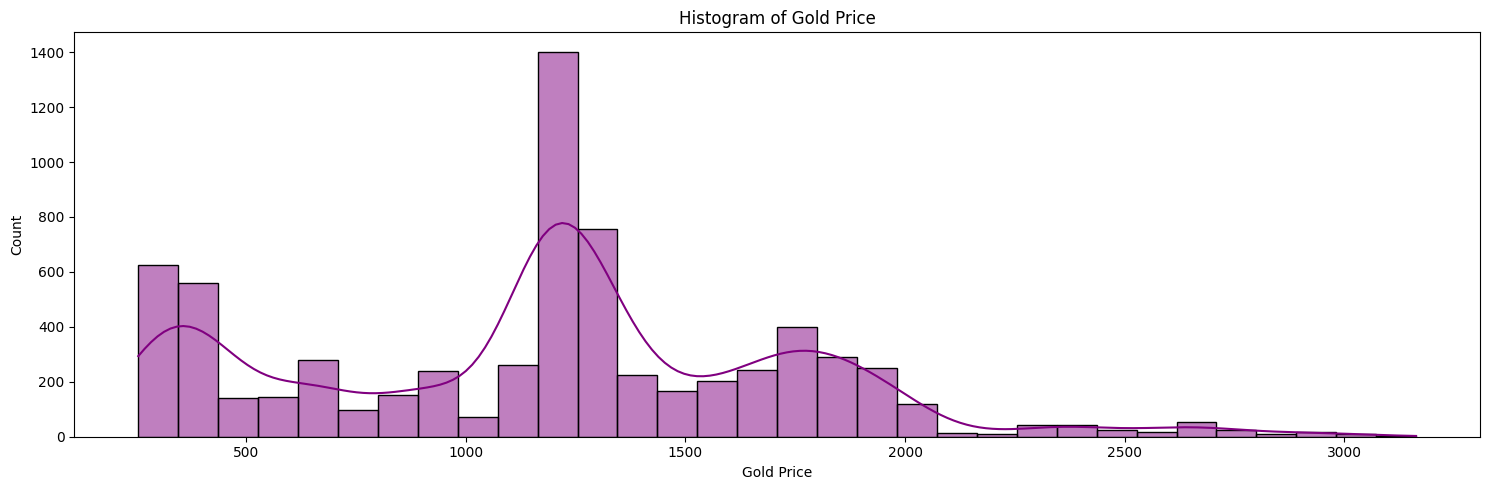

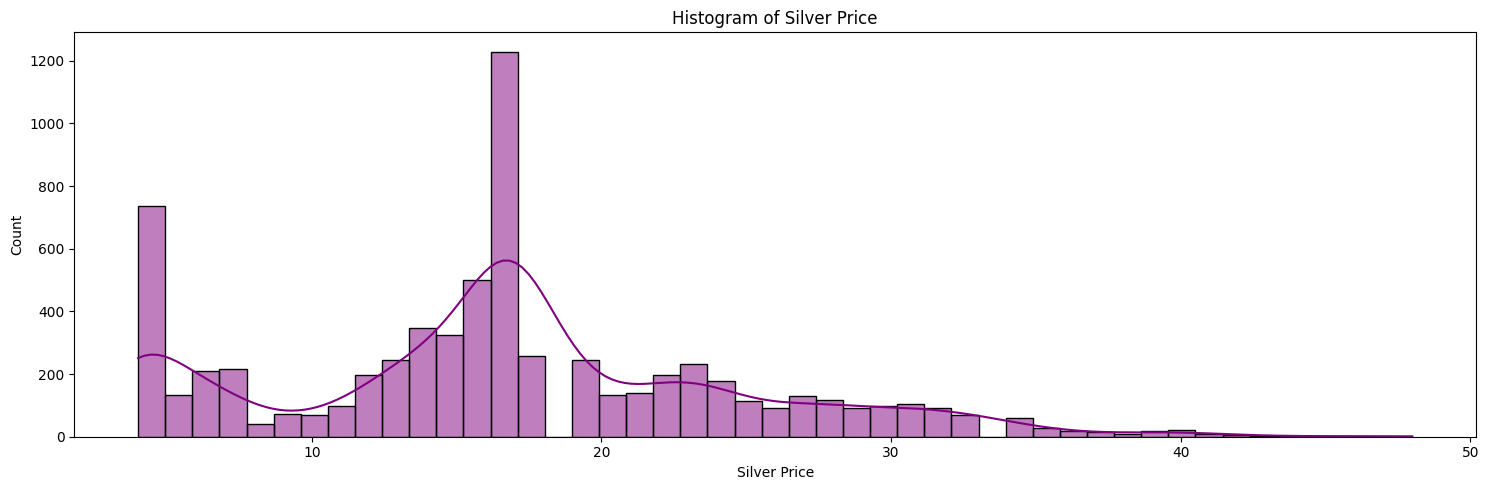

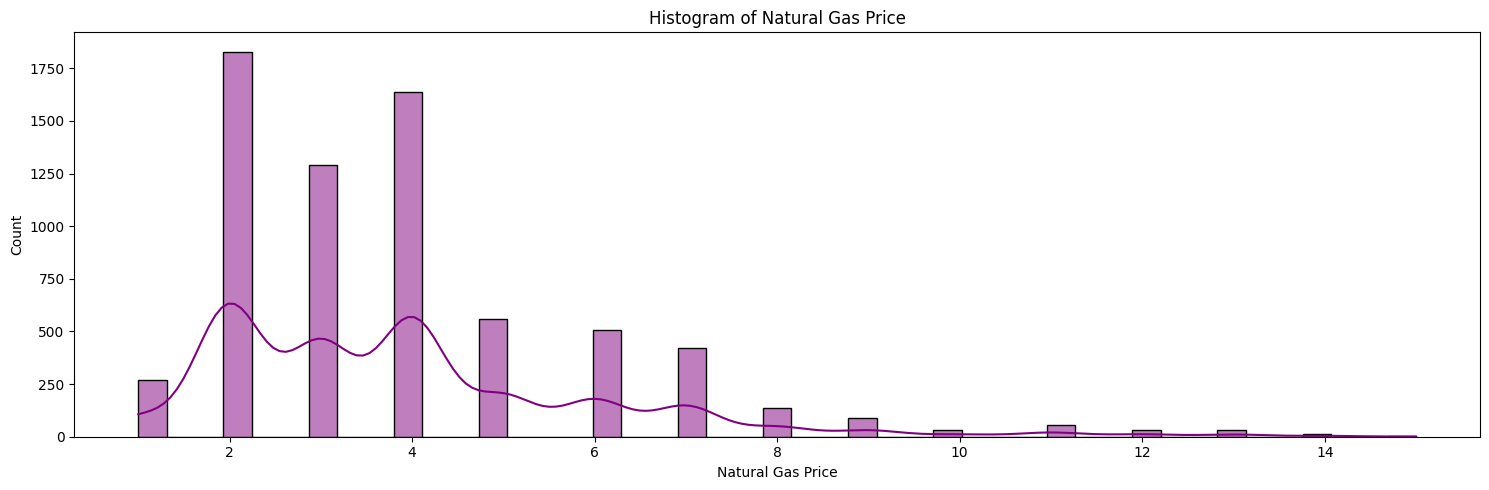

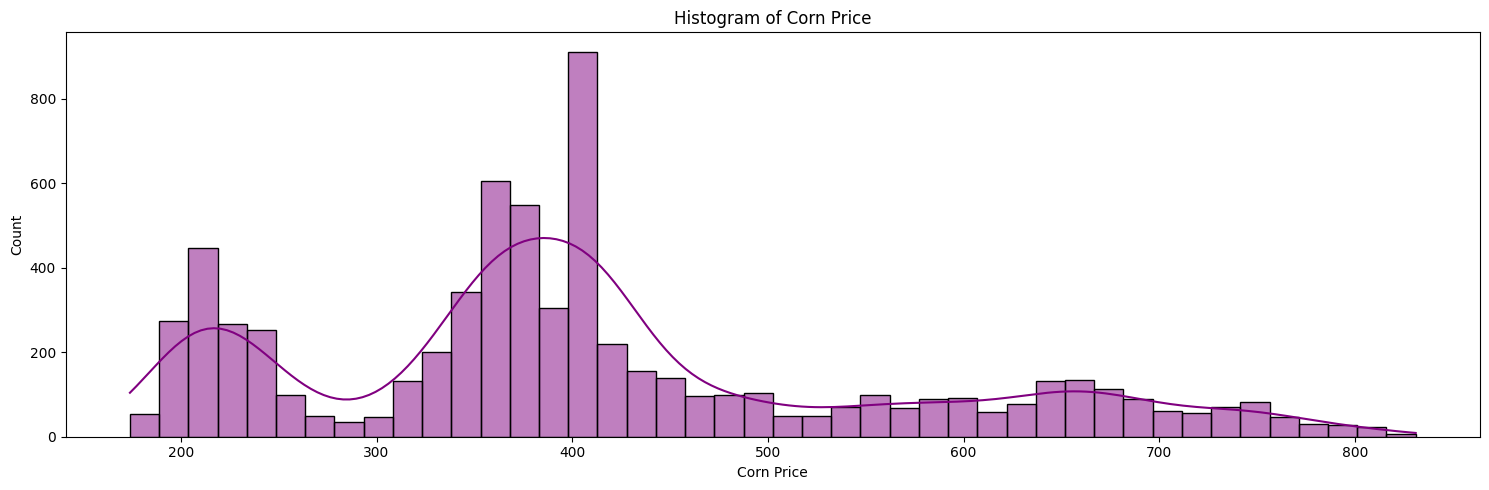

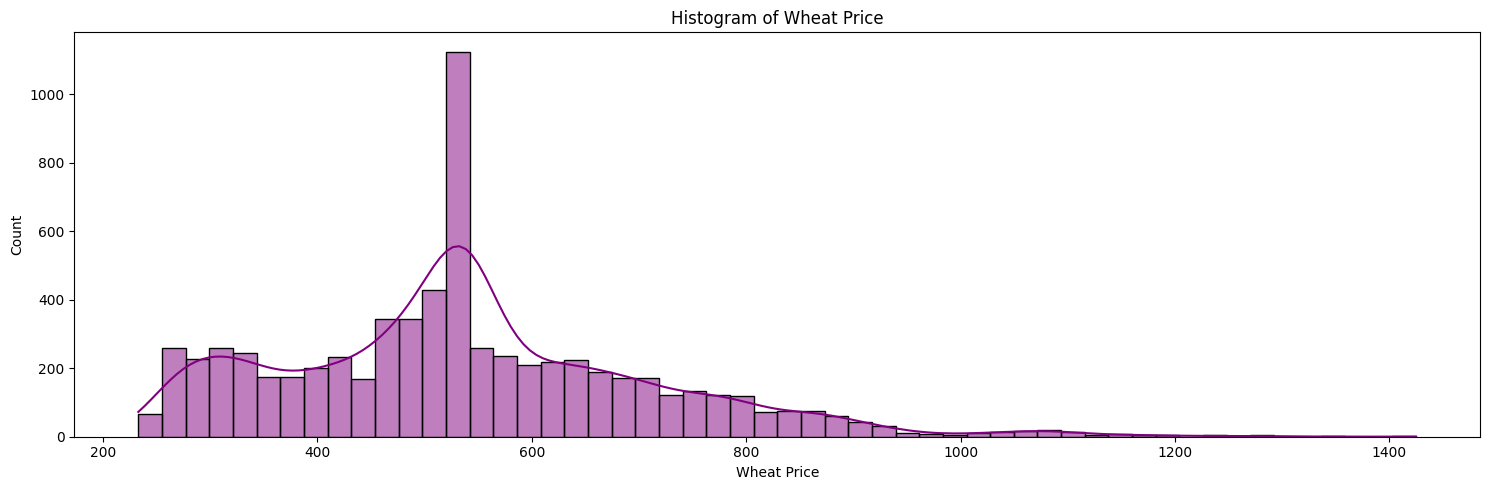

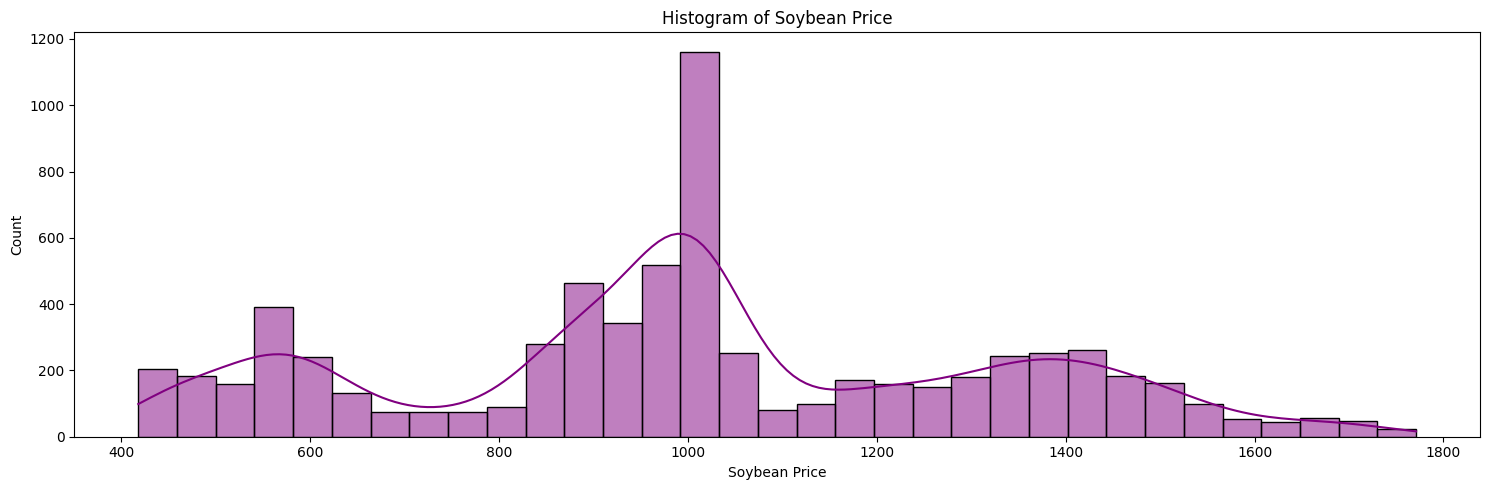

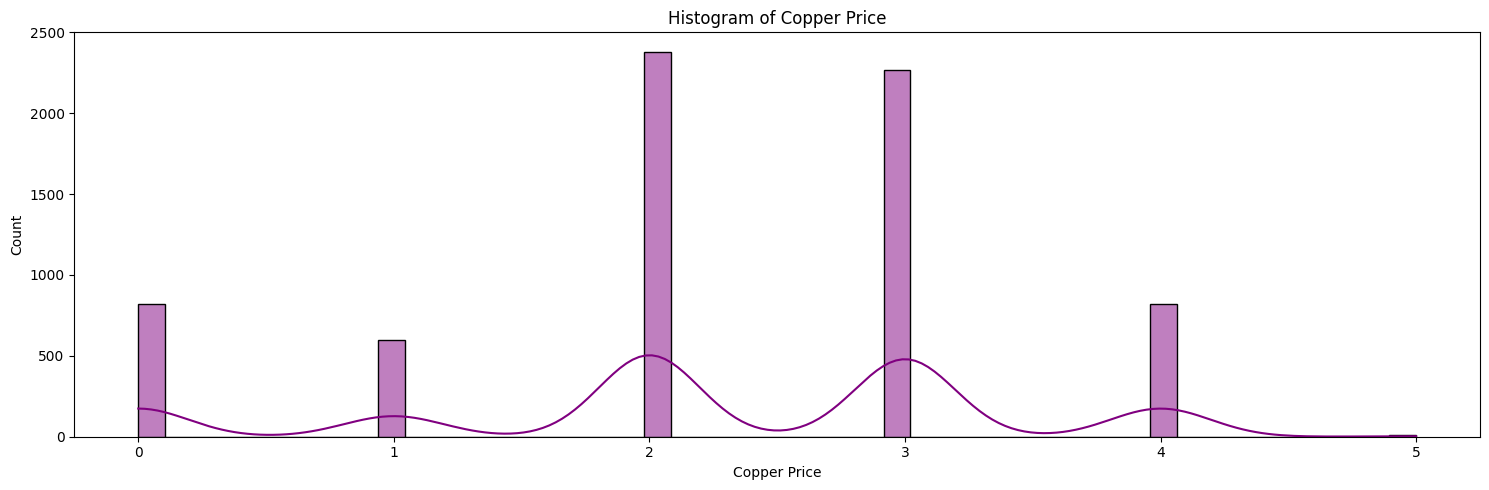

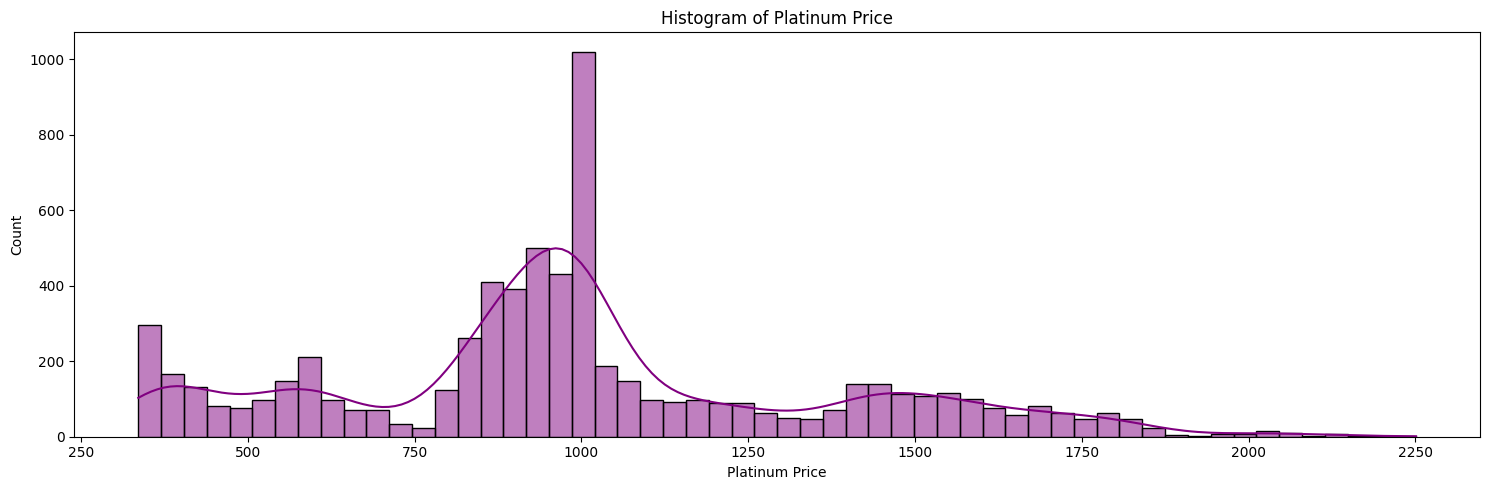

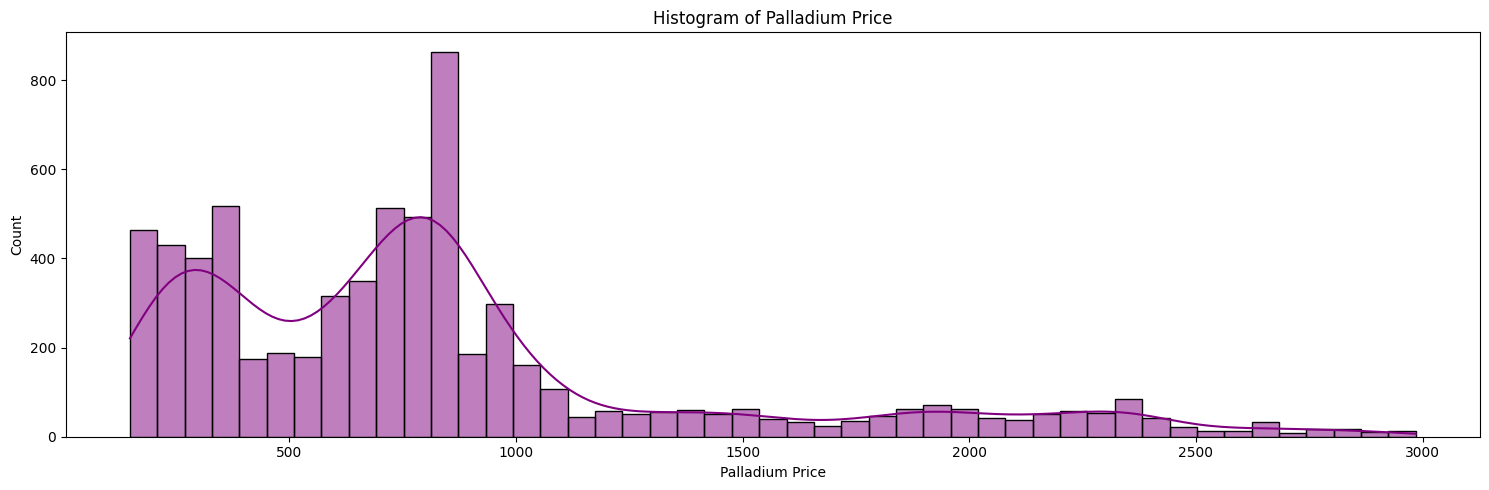

In [21]:
# COUNT PLOT

feat = ['Silver Price','Natural Gas Price','Copper Price']
for features in feat:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.countplot(x=features,data=df,palette ='viridis')
        plt.title('Countplot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


for features in cols:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[features].dropna(),color='purple',kde=True)
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
        

In [22]:
df

,WTI Oil Price,Brent Oil Price,Gold Price,Silver Price,Natural Gas Price,Corn Price,Wheat Price,Soybean Price,Copper Price,Platinum Price,Palladium Price
0,64,78,1178,17,4,411,538,1006,2,402,840
1,64,78,1178,17,4,411,538,1006,2,405,840
2,64,78,1178,17,4,411,538,1006,2,404,840
3,64,78,1178,17,4,411,538,1006,2,406,840
4,64,78,1178,17,4,411,538,1006,2,405,840
...,...,...,...,...,...,...,...,...,...,...,...
6900,69,73,3020,34,3,451,535,1001,5,967,962
6901,69,74,3060,34,3,450,532,1016,5,983,973
6902,69,73,3086,34,4,453,528,1023,5,977,974
6903,71,74,3122,34,4,457,537,1014,5,1009,991


In [23]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb
# from lightgbm import LGBMRegressor

# # 🔹 Classification Algorithms
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# # 🔹 Clustering Algorithms
# from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [24]:
# X = df.drop(columns=['Platinum Price','Palladium Price'])
# y = df['Platinum Price']

In [25]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# lr = LogisticRegression(max_iter=500,solver='lbfgs',class_weight='balanced')

In [27]:
# model1 = {
#     "Linear Regression": LogisticRegression(max_iter=50,solver='lbfgs',class_weight='balanced'),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
#     "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)  
# }

In [28]:
# from sklearn.preprocessing import LabelEncoder
# # Encode the target labels
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)


# # le = LabelEncoder()
# # y_train_encoded = le.fit_transform(y_train)

# # # Ensure y_test only contains labels seen in training
# # y_test_filtered = np.array([label if label in le.classes_ else None for label in y_test])

# # # Remove None values before encoding (to avoid errors)
# # y_test_filtered = y_test_filtered[y_test_filtered != None]

# # y_test_encoded = le.transform(y_test_filtered)



# results={}
# for name, model1 in models.items():
#     # Fit the model with the encoded labels
#     model.fit(X_train, y_train_encoded)
#     y_pred = model1.predict(X_test)

    
    
#     mae = mean_absolute_error(y_test_encoded, y_pred)
#     mse = mean_squared_error(y_test_encoded, y_pred)
#     r2 = r2_score(y_test_encoded, y_pred)

#     results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

In [29]:
# df

In [30]:
# results_df = pd.DataFrame(results).T
# print(results_df)

In [31]:
# model2 = {
#     "Decision TreeClassifier": DecisionTreeClassifier(),
#     "RandomForest Classifier": RandomForestClassifier(),
#     "GradientBoosting Classifier": GradientBoostingClassifier(),
#     "AdaBoost Classifier": AdaBoostClassifier(),
#     "sc": SVC(),
#     "KNeighbors Classifier": KNeighborsClassifier(),
#     "MLP Classifier" : MLPClassifier(),
#     "XGB Classifier": XGBClassifier(),
#     "LGBM Classifier":LGBMClassifier()
    
# }

In [32]:
# results2={}
# for name, model2 in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model2.predict(X_test)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     results2[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}